### Linear Regression Demonstration (Boston Housing Dataset)

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
inp = pd.read_csv("C:/Users/cw/Downloads/BostonHousing.csv")

In [12]:
inp.shape

(506, 14)

In [4]:
inp.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
inp.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

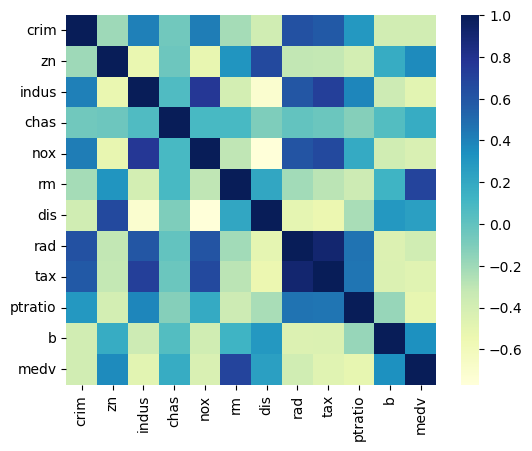

In [20]:
names  = []
correlations = data.corr()
sns.heatmap(correlations,square=True,cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [6]:
data = inp.drop(columns=['age'])

In [11]:
data.drop(columns=['lstat'],inplace=True)

In [13]:
data.head(5)

,crim,zn,indus,chas,nox,rm,dis,rad,tax,ptratio,b,medv
0,0.00632,18.0,2.31,0,0.538,6.575,4.0900,1,296,15.3,396.90,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,4.9671,2,242,17.8,396.90,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,4.9671,2,242,17.8,392.83,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,6.0622,3,222,18.7,394.63,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,6.0622,3,222,18.7,396.90,36.2


In [28]:
X=inp.drop(columns=['medv'])

In [29]:
y=inp['medv']

In [37]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
X_train.shape

(404, 13)

In [39]:
X_test.shape

(102, 13)

In [40]:
y_train.shape

(404,)

In [41]:
y_test.shape

(102,)

In [46]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [47]:
y_pred = lr_model.predict(X_test)

In [48]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [50]:
print("Mean Squared Error is : ",mse)
print("R Mean Squared Error is : ",r2)

Mean Squared Error is :  24.291119474973613
R Mean Squared Error is :  0.6687594935356307


In [52]:
import numpy as np
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Function to take user input and predict house price
def predict_house_price():
    # List of feature names and their corresponding value ranges (approximate)
    feature_info = {
        'crim': 'per capita crime rate by town (range: 0 to 100)',
        'zn': 'proportion of residential land zoned for lots over 25,000 sq. ft. (range: 0 to 100)',
        'indus': 'proportion of non-retail business acres per town (range: 0 to 30)',
        'chas': 'Charles River dummy variable (0 = not bounded, 1 = bounded)',
        'nox': 'nitric oxides concentration (parts per 10 million) (range: 0.3 to 0.9)',
        'rm': 'average number of rooms per dwelling (range: 3 to 9)',
        'age': 'proportion of owner-occupied units built prior to 1940 (range: 0 to 100)',
        'dis': 'weighted distances to five Boston employment centers (range: 1 to 12)',
        'rad': 'index of accessibility to radial highways (range: 1 to 24)',
        'tax': 'full-value property-tax rate per $10,000 (range: 180 to 720)',
        'ptratio': 'pupil-teacher ratio by town (range: 12 to 22)',
        'b': '1000(Bk - 0.63)^2 where Bk is the proportion of Black residents (range: 0 to 400)',
        'lstat': 'percentage of lower status of the population (range: 2 to 38)'
    }

    # Initialize an empty list to store user inputs
    user_input = []

    print("Please enter the following values for the house:")

    # Loop through each feature and get input from the user, specifying ranges
    for feature, description in feature_info.items():
        value = float(input(f"Enter value for {feature} ({description}): "))  # Get the value from user
        user_input.append(value)

    # Convert user input into a NumPy array and reshape it for prediction
    input_data = np.array(user_input).reshape(1, -1)

    # Make prediction using the trained linear regression model
    predicted_price = lr_model.predict(input_data)

    # Output the predicted price
    print(f"\nPredicted House Price: ${predicted_price[0] * 1000:.2f}")

# Call the function to predict house price based on user input
predict_house_price()

Please enter the following values for the house:


Enter value for crim (per capita crime rate by town (range: 0 to 100)):  0.17004
Enter value for zn (proportion of residential land zoned for lots over 25,000 sq. ft. (range: 0 to 100)):  12.5
Enter value for indus (proportion of non-retail business acres per town (range: 0 to 30)):  7.87
Enter value for chas (Charles River dummy variable (0 = not bounded, 1 = bounded)):  0
Enter value for nox (nitric oxides concentration (parts per 10 million) (range: 0.3 to 0.9)):  0.524
Enter value for rm (average number of rooms per dwelling (range: 3 to 9)):  6.004
Enter value for age (proportion of owner-occupied units built prior to 1940 (range: 0 to 100)):  85.9
Enter value for dis (weighted distances to five Boston employment centers (range: 1 to 12)):  6.5921
Enter value for rad (index of accessibility to radial highways (range: 1 to 24)):  5
Enter value for tax (full-value property-tax rate per $10,000 (range: 180 to 720)):  311
Enter value for ptratio (pupil-teacher ratio by town (range: 12


Predicted House Price: $18630.07


In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [56]:
X_train_scaler = scaler.fit_transform(X_train)

In [61]:
X_test_scaler = scaler.transform(X_test)

In [62]:
scaled_model = LinearRegression()
scaled_model.fit(X_train_scaler,y_train)

LinearRegression()

In [65]:
pred2 = scaled_model.predict(X_test_scaler) 

In [66]:
mse = mean_squared_error(y_test,pred2)
r2 = r2_score(y_test,pred2)

In [67]:
print("Mean Squared Error is : ",mse)
print("R Mean Squared Error is : ",r2)

Mean Squared Error is :  27.40683628433727
R Mean Squared Error is :  0.6262727067493545


In [68]:
import numpy as np
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Function to take user input and predict house price
def predict_house_price():
    # List of feature names and their corresponding value ranges (approximate)
    feature_info = {
        'crim': 'per capita crime rate by town (range: 0 to 100)',
        'zn': 'proportion of residential land zoned for lots over 25,000 sq. ft. (range: 0 to 100)',
        'indus': 'proportion of non-retail business acres per town (range: 0 to 30)',
        'chas': 'Charles River dummy variable (0 = not bounded, 1 = bounded)',
        'nox': 'nitric oxides concentration (parts per 10 million) (range: 0.3 to 0.9)',
        'rm': 'average number of rooms per dwelling (range: 3 to 9)',
        'age': 'proportion of owner-occupied units built prior to 1940 (range: 0 to 100)',
        'dis': 'weighted distances to five Boston employment centers (range: 1 to 12)',
        'rad': 'index of accessibility to radial highways (range: 1 to 24)',
        'tax': 'full-value property-tax rate per $10,000 (range: 180 to 720)',
        'ptratio': 'pupil-teacher ratio by town (range: 12 to 22)',
        'b': '1000(Bk - 0.63)^2 where Bk is the proportion of Black residents (range: 0 to 400)',
        'lstat': 'percentage of lower status of the population (range: 2 to 38)'
    }

    # Initialize an empty list to store user inputs
    user_input = []

    print("Please enter the following values for the house:")

    # Loop through each feature and get input from the user, specifying ranges
    for feature, description in feature_info.items():
        value = float(input(f"Enter value for {feature} ({description}): "))  # Get the value from user
        user_input.append(value)

    # Convert user input into a NumPy array and reshape it for prediction
    input_data = np.array(user_input).reshape(1, -1)

    # Make prediction using the trained linear regression model
    predicted_price = scaled_model.predict(input_data)

    # Output the predicted price
    print(f"\nPredicted House Price: ${predicted_price[0] * 1000:.2f}")

# Call the function to predict house price based on user input
predict_house_price()

Please enter the following values for the house:


Enter value for crim (per capita crime rate by town (range: 0 to 100)):  0.17004
Enter value for zn (proportion of residential land zoned for lots over 25,000 sq. ft. (range: 0 to 100)):  12.5
Enter value for indus (proportion of non-retail business acres per town (range: 0 to 30)):  7.87
Enter value for chas (Charles River dummy variable (0 = not bounded, 1 = bounded)):  0
Enter value for nox (nitric oxides concentration (parts per 10 million) (range: 0.3 to 0.9)):  0.524
Enter value for rm (average number of rooms per dwelling (range: 3 to 9)):  6.004
Enter value for age (proportion of owner-occupied units built prior to 1940 (range: 0 to 100)):  85.9
Enter value for dis (weighted distances to five Boston employment centers (range: 1 to 12)):  6.5921
Enter value for rad (index of accessibility to radial highways (range: 1 to 24)):  5
Enter value for tax (full-value property-tax rate per $10,000 (range: 180 to 720)):  311
Enter value for ptratio (pupil-teacher ratio by town (range: 12


Predicted House Price: $-178298.64
